Sequential API and Functional API are declarative, you need to declare layers and how they are connected. The cons to this is that the network is static.
If you need a more dynamic network which uses loop, conditions, etc.. you should use Subclassing API.
Lets see how to create the wide and deep model using this API.
![](https://www.researchgate.net/profile/Kaveh-Bastani/publication/328161216/figure/fig3/AS:679665219928064@1539056224036/Illustration-of-the-wide-and-deep-model-which-is-an-integration-of-wide-component-and.ppm)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Concatenate, Input

We separate the creation of layers in the constructor from their usage in the call method

In [ ]:
class WideAndDeepModel(keras.models.Model):
  def __init__(self, units = 30, activation = "relu", **kwargs):
    super().__init__(**kwargs) #handle standard args like name,etch..
    self.hidden1 = Dense(units,activation = activation)
    self.hidden2 = Dense(units, activation = activation)
    self.main_output = Dense(1)
    self.aux_output = Dense(1)

  def call(self, inputs):
    input_A, input_B = inputs
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    concat = Concatenate()([input_A, hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)

    return main_output, aux_output

In [ ]:
model = WideAndDeepModel()

In [ ]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
housing = datasets.fetch_california_housing()

x_train_full, x_test, y_train_full, y_test = train_test_split(housing["data"],housing["target"])
x_train, x_val, y_train, y_val = train_test_split(x_train_full,y_train_full)

In [ ]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

In [ ]:
x_train_A, x_train_B = x_train[:,:5],x_train[:,2:]
x_val_A, x_val_B = x_val[:,:5], x_val[:,2:]
x_test_A, x_test_B = x_test[:,:5], x_test[:,2:] 

In [ ]:
model.compile(optimizer = "sgd", loss= ["mse","mse"], loss_weights=[0.9,0.1])

In [ ]:
history = model.fit((x_train_A, x_train_B), (y_train,y_train), validation_data=((x_val_A,x_val_B), (y_val,y_val)), epochs=20)

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 0.9659 - output_1_loss: 0.8621 - output_2_loss: 1.8996 - val_loss: 0.8843 - val_output_1_loss: 0.8532 - val_output_2_loss: 1.1647
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5782 - output_1_loss: 0.5346 - output_2_loss: 0.9700 - val_loss: 0.7074 - val_output_1_loss: 0.6824 - val_output_2_loss: 0.9318
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4953 - output_1_loss: 0.4592 - output_2_loss: 0.8196 - val_loss: 0.4533 - val_output_1_loss: 0.4228 - val_output_2_loss: 0.7279
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4505 - output_1_loss: 0.4236 - output_2_loss: 0.6926 - val_loss: 0.4282 - val_output_1_loss: 0.4028 - val_output_2_loss: 0.6566
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4323 - output_1_loss: 0.4094 - output_2_loss: 0.6388 - val_loss: 0.4305 - val_output_1_loss: 0.4103 - val_ou

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

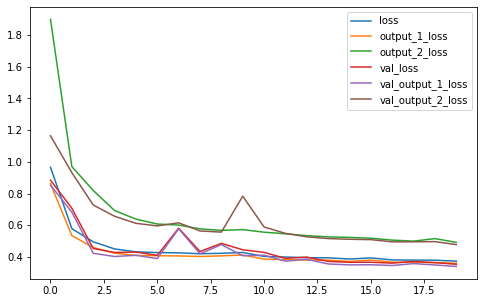

In [ ]:
df = pd.DataFrame(history.history)
df.plot(figsize = (8,5))
plt.show()